# The objective is to predict the fare of the taxi ride using Random Forest.

# Import Statemets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set Options

In [2]:
pd.options.display.max_rows=None

pd.options.display.max_columns=None

plt.rcParams['figure.figsize']=[15,8]


In [3]:
os.getcwd()

'C:\\Users\\Dhananjay\\3D Objects\\imarticus PGDA\\Machine learning\\Supervised Learning\\RANDOM FOREST\\Taxi Fare Prediction'

# Loading the Data

In [4]:
dfInput=pd.read_csv('TaxiFare.csv')
dfInput.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


Since the column  unique_id does not make any effect on the target variale so drop the column.

In [5]:
dfInput.drop('unique_id',axis=1,inplace=True)

In [6]:
dfInput.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Checking the  data type

In [7]:
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


Conclusion :-  Except the column date_time_of_pickup  remaining all other columns are numeric in datatype. The date_time_of_pickup need to be splited to new columns time_of_pickup and date_of_pickup.

In [8]:
# coverting object datatype to date

dfInput['date_time_of_pickup']=pd.to_datetime(dfInput.date_time_of_pickup)

In [9]:
# rechecking the datatype

dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [10]:
# creatig new columns by spliting  date_time_of_pickup

dfInput['year_of_pick_up']=dfInput['date_time_of_pickup'].dt.year
dfInput['month_of_pick_up']=dfInput['date_time_of_pickup'].dt.month
dfInput['day_of_pick_up'] = dfInput['date_time_of_pickup'].dt.day


# creating new columns by spliting date_time_of_pickup

dfInput['hour_of_pick_up']=dfInput['date_time_of_pickup'].dt.hour
dfInput['min_of_pick_up']=dfInput['date_time_of_pickup'].dt.minute
dfInput['sec_of_pick_up']=dfInput['date_time_of_pickup'].dt.second

In [11]:
# new data frame after updating

dfInput.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year_of_pick_up,month_of_pick_up,day_of_pick_up,hour_of_pick_up,min_of_pick_up,sec_of_pick_up
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0


In [12]:
# rechecking the datatypes
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
 7   year_of_pick_up       50000 non-null  int64              
 8   month_of_pick_up      50000 non-null  int64              
 9   day_of_pick_up        50000 non-null  int64              
 10  hour_of_pick_up       50000 non-null  int64              
 11  min_of_pick_up        50000 non-null  int64              
 12  sec_

In [13]:
# droping the date_time_of_pickup

dfInput.drop('date_time_of_pickup',axis=1,inplace=True)


In [14]:
# viewing the data 

dfInput.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year_of_pick_up,month_of_pick_up,day_of_pick_up,hour_of_pick_up,min_of_pick_up,sec_of_pick_up
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0


# Summary Statistics

In [15]:
dfInput.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
year_of_pick_up,50000.0,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
month_of_pick_up,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
day_of_pick_up,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
hour_of_pick_up,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000


Conclusion :- From the summary statistics we can se taht we require standardisation of data by using the minmax scalar. The minmax scalar is being used since we contain negative values .

# Distribution of Variables

C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

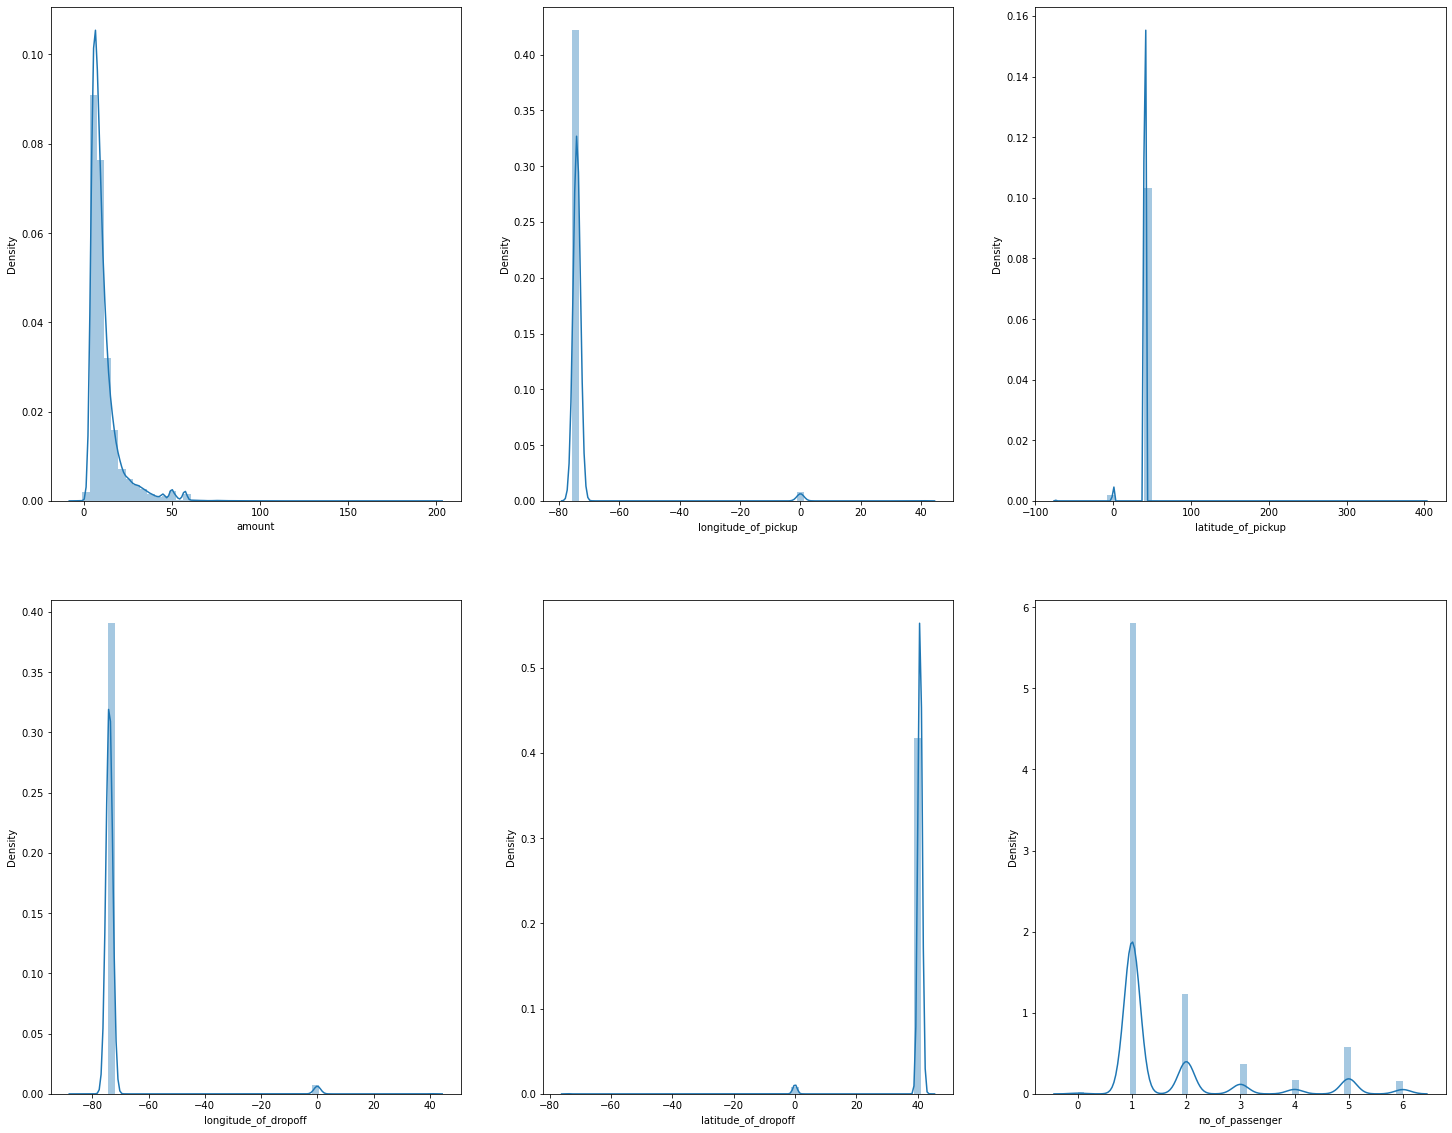

In [16]:
# ploting the distplot


fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(25,20))


for  variable, subplot in zip(dfInput, ax.flatten()):
    
    sns.distplot(dfInput[variable],kde=True,ax = subplot)

Since from graph the skewness is not clear. we need to use the function skew() to find the skewness.

In [17]:
# Finding the skewness using the function.
# since we don't  have any categorical value so we can directly apply the skew function

skewnessItems=dfInput.skew(axis=0,skipna=True)


skewnessItems.sort_values()


latitude_of_dropoff    -8.189175
latitude_of_pickup     -3.478584
hour_of_pick_up        -0.425955
min_of_pick_up         -0.012616
day_of_pick_up          0.018692
year_of_pick_up         0.063471
month_of_pick_up        0.110456
sec_of_pick_up          0.832244
no_of_passenger         2.010222
amount                  3.562101
longitude_of_dropoff    7.002893
longitude_of_pickup     7.014435
dtype: float64

In [18]:
dfInput.shape

(50000, 12)

In [19]:
dfInput.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year_of_pick_up', 'month_of_pick_up', 'day_of_pick_up',
       'hour_of_pick_up', 'min_of_pick_up', 'sec_of_pick_up'],
      dtype='object')

In [20]:
skewnessItems.shape

(12,)

Conclusion :- All the columns in dataframe are either left or right skewed. 

The left skewed columns are  : 'latitude_of_pickup', 'latitude_of_dropoff', 'hour_of_pick_up', 'min_of_pick_up'.

The right skewed columns are  :'amount', 'longitude_of_pickup', 'longitude_of_dropoff', 'no_of_passenger','year_of_pick_up',      'month_of_pick_up', 'day_of_pick_up', 'sec_of_pick_up' .

# Correlation

In [21]:
dfInput.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year_of_pick_up,month_of_pick_up,day_of_pick_up,hour_of_pick_up,min_of_pick_up,sec_of_pick_up
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583,0.120831,0.026876,-0.001460,-0.022018,-0.012476,0.006849
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604,-0.001284,0.000416,0.006001,0.004910,0.005131,-0.006588
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237,-0.001334,0.000711,-0.006657,-0.004606,-0.006230,0.007334
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936,-0.000250,0.001407,0.005135,0.005490,0.007945,-0.011127
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958,-0.001888,-0.000422,-0.007928,-0.004515,-0.007152,0.012629
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000,0.006344,0.009175,0.006841,0.011350,0.002967,-0.209038
year_of_pick_up,0.120831,-0.001284,-0.001334,-0.000250,-0.001888,0.006344,1.000000,-0.115742,-0.011144,0.004104,-0.002636,0.085598
month_of_pick_up,0.026876,0.000416,0.000711,0.001407,-0.000422,0.009175,-0.115742,1.000000,-0.017241,-0.001950,-0.001421,-0.053062
day_of_pick_up,-0.001460,0.006001,-0.006657,0.005135,-0.007928,0.006841,-0.011144,-0.017241,1.000000,-0.008261,-0.001202,-0.007535
hour_of_pick_up,-0.022018,0.004910,-0.004606,0.005490,-0.004515,0.011350,0.004104,-0.001950,-0.008261,1.000000,-0.001140,-0.002258


<AxesSubplot:>

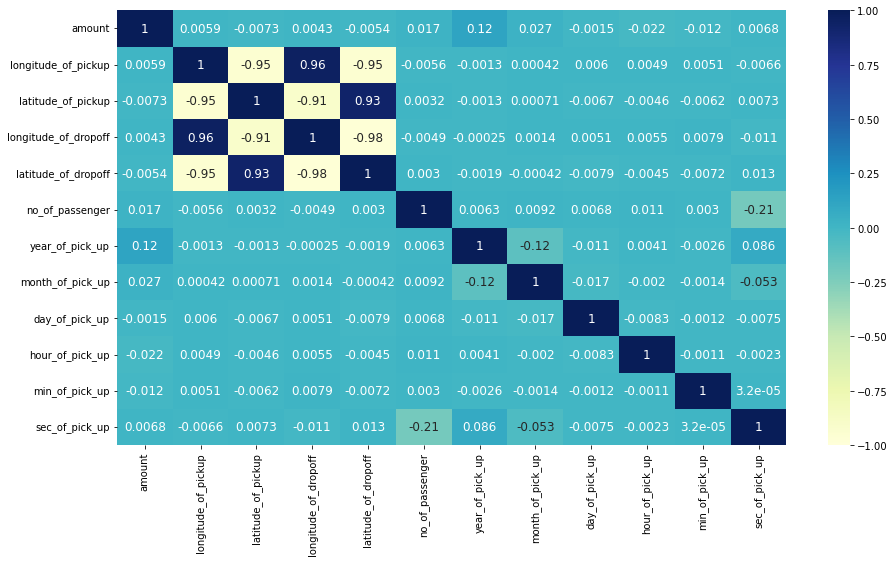

In [22]:
# ploting heat map

sns.heatmap(dfInput.corr(),cmap = 'YlGnBu',vmax=1.0,vmin=-1.0,annot=True,annot_kws = {"size": 12})

Conclusion : All the columns have strong corelation with the target variable amount. But we can find a some multicolinearity here  between different columns. So we need to confirm the same by using Variance Inflation Factor(VIF).

In [23]:
dfInput.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year_of_pick_up', 'month_of_pick_up', 'day_of_pick_up',
       'hour_of_pick_up', 'min_of_pick_up', 'sec_of_pick_up'],
      dtype='object')

In [24]:
# calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = dfInput[['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature          VIF
0   longitude_of_pickup  1042.855003
1    latitude_of_pickup   548.369102
2  longitude_of_dropoff  1906.753342
3   latitude_of_dropoff  1594.243362


In [25]:
# recalculating VIF by removing some variable 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = dfInput[['longitude_of_pickup', 'latitude_of_pickup', 'latitude_of_dropoff']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature         VIF
0  longitude_of_pickup  679.783558
1   latitude_of_pickup  469.433148
2  latitude_of_dropoff  472.927652


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = dfInput[['longitude_of_pickup', 'latitude_of_pickup']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature         VIF
0  longitude_of_pickup  433.142993
1   latitude_of_pickup  433.142993


Conclusion :- The columns longitude_of_dropoff and latitude_of_dropoff   have high VIF value. So we don't want to consider these columns for model creations.

In [27]:
# droping the columns longitude_of_dropoff and latitude_of_dropoff  since they have high multicolinearity

dfInput.drop(['longitude_of_dropoff','latitude_of_dropoff'],axis=1,inplace=True)

In [28]:
# after droping
dfInput.head()

,amount,longitude_of_pickup,latitude_of_pickup,no_of_passenger,year_of_pick_up,month_of_pick_up,day_of_pick_up,hour_of_pick_up,min_of_pick_up,sec_of_pick_up
0,4.5,-73.844311,40.721319,1,2009,6,15,17,26,21
1,16.9,-74.016048,40.711303,1,2010,1,5,16,52,16
2,5.7,-73.982738,40.761270,2,2011,8,18,0,35,0
3,7.7,-73.987130,40.733143,1,2012,4,21,4,30,42
4,5.3,-73.968095,40.768008,1,2010,3,9,7,51,0


# Outliers

<AxesSubplot:>

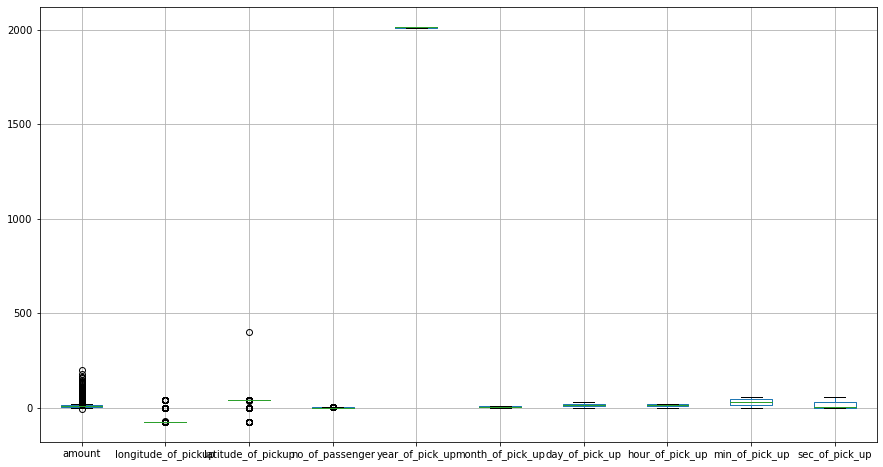

In [29]:
# ploting Box plot to find Outliers
dfInput.boxplot()

<AxesSubplot:>

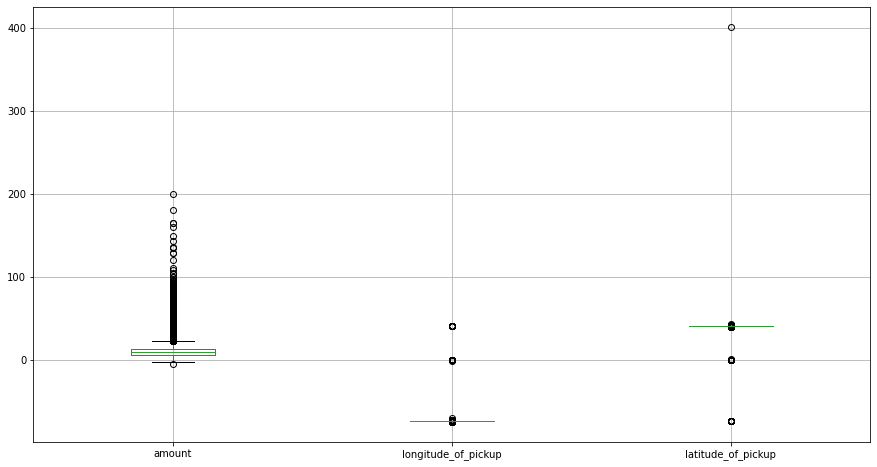

In [30]:
dfInput.boxplot(['amount', 'longitude_of_pickup', 'latitude_of_pickup'])

<AxesSubplot:>

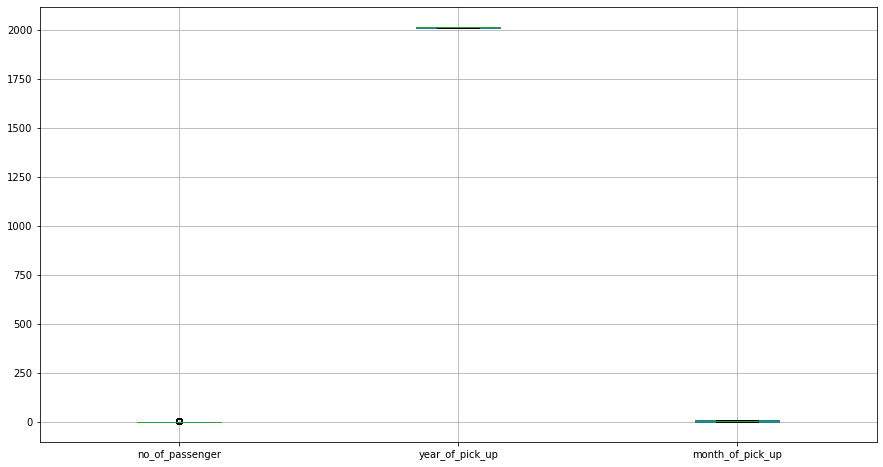

In [31]:
dfInput.boxplot(['no_of_passenger', 'year_of_pick_up', 'month_of_pick_up'])

<AxesSubplot:>

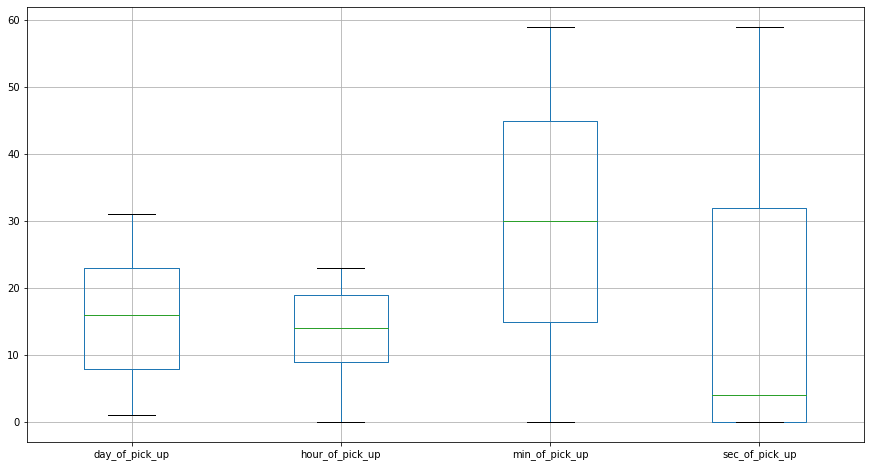

In [32]:
dfInput.boxplot(['day_of_pick_up', 'hour_of_pick_up', 'min_of_pick_up',
       'sec_of_pick_up'])

Conclutions :- The columns 'amount', 'longitude_of_pickup', 'latitude_of_pickup' and 'no_of_passenger'  contains the outliers.
The most outlier is found in target variable 'amount'.

# Treating Outliers

In [33]:
Q1=dfInput.quantile(0.25)
Q1

amount                    6.000000
longitude_of_pickup     -73.992062
latitude_of_pickup       40.734880
no_of_passenger           1.000000
year_of_pick_up        2010.000000
month_of_pick_up          3.000000
day_of_pick_up            8.000000
hour_of_pick_up           9.000000
min_of_pick_up           15.000000
sec_of_pick_up            0.000000
Name: 0.25, dtype: float64

In [34]:
Q3=dfInput.quantile(0.75)
Q3

amount                   12.500000
longitude_of_pickup     -73.967148
latitude_of_pickup       40.767360
no_of_passenger           2.000000
year_of_pick_up        2013.000000
month_of_pick_up          9.000000
day_of_pick_up           23.000000
hour_of_pick_up          19.000000
min_of_pick_up           45.000000
sec_of_pick_up           32.000000
Name: 0.75, dtype: float64

In [35]:
IQR= Q3-Q1
IQR

amount                  6.500000
longitude_of_pickup     0.024914
latitude_of_pickup      0.032480
no_of_passenger         1.000000
year_of_pick_up         3.000000
month_of_pick_up        6.000000
day_of_pick_up         15.000000
hour_of_pick_up        10.000000
min_of_pick_up         30.000000
sec_of_pick_up         32.000000
dtype: float64

In [36]:
# shape of dataframe before removing the outliers

dfInput.shape

(50000, 10)

In [37]:
# removing the outlier



dfInput=dfInput[~((dfInput < (Q1- 1.5 * IQR ) ) |  (dfInput > ( Q3+ 1.5 * IQR ) )  ).any(axis=1)]

In [38]:
# shape of dataframe after removing outliers
dfInput.shape

(38783, 10)

<AxesSubplot:>

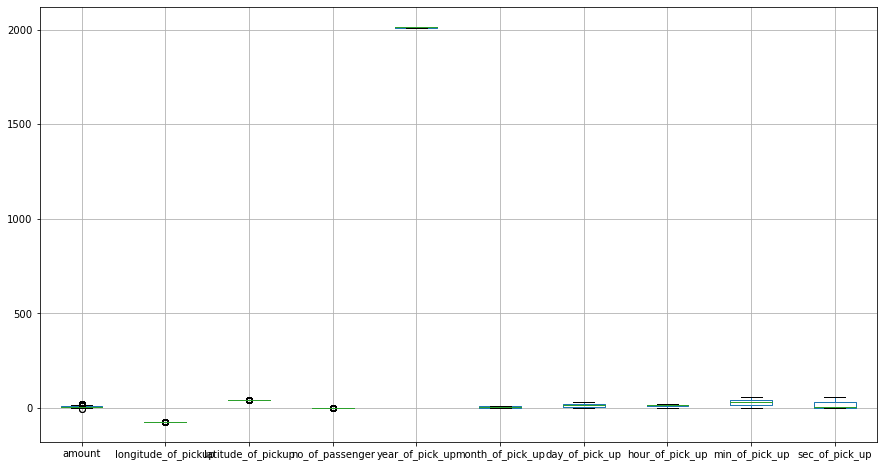

In [39]:
# reploting the box plot

dfInput.boxplot()

In [40]:
dfInput.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'no_of_passenger', 'year_of_pick_up', 'month_of_pick_up',
       'day_of_pick_up', 'hour_of_pick_up', 'min_of_pick_up',
       'sec_of_pick_up'],
      dtype='object')

<AxesSubplot:>

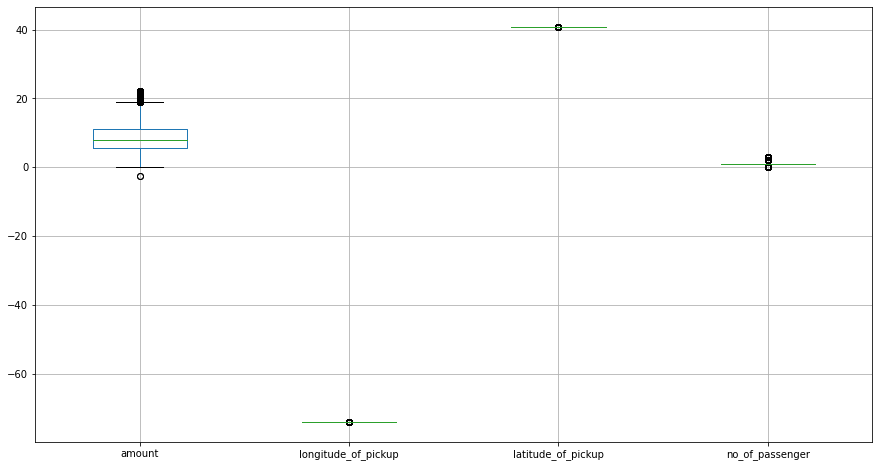

In [41]:
dfInput.boxplot(['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'no_of_passenger'])

# Missing Value Treatment

In [42]:
# getting columns with null values 

dfNullItems=pd.DataFrame(columns=['Count','Percentage'])
nullItemsCount=dfInput.isnull().sum().sort_values(ascending=False)
nullItemsPercentage=((dfInput.isnull().sum() * 100)/(dfInput.isnull().count())).sort_values(ascending=False)

dfNullItems['Count']=nullItemsCount
dfNullItems['Percentage']=nullItemsPercentage

dfNullItems

,Count,Percentage
amount,0,0.0
longitude_of_pickup,0,0.0
latitude_of_pickup,0,0.0
no_of_passenger,0,0.0
year_of_pick_up,0,0.0
month_of_pick_up,0,0.0
day_of_pick_up,0,0.0
hour_of_pick_up,0,0.0
min_of_pick_up,0,0.0
sec_of_pick_up,0,0.0


Conclusion :- No columns with null values are been found.

# Model Building 

In [43]:
# import statements 

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,r2_score,mean_squared_error,roc_curve,roc_auc_score
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn  import metrics
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [44]:
# making a backup of data

dfFinal=dfInput.copy(deep=True)
dfFinal.shape

(38783, 10)

In [45]:
dfFinal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,38783.0,8.891006,4.101071,-2.500000,5.700000,8.000000,11.000000,22.100000
longitude_of_pickup,38783.0,-73.981766,0.016199,-74.029201,-73.992779,-73.982803,-73.971398,-73.929810
latitude_of_pickup,38783.0,40.752398,0.021884,40.686192,40.737578,40.753272,40.766748,40.816026
no_of_passenger,38783.0,1.258618,0.545729,0.000000,1.000000,1.000000,1.000000,3.000000
year_of_pick_up,38783.0,2011.700229,1.863716,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
month_of_pick_up,38783.0,6.249413,3.466663,1.000000,3.000000,6.000000,9.000000,12.000000
day_of_pick_up,38783.0,15.643143,8.658966,1.000000,8.000000,16.000000,23.000000,31.000000
hour_of_pick_up,38783.0,13.561019,6.451913,0.000000,9.000000,14.000000,19.000000,23.000000
min_of_pick_up,38783.0,29.711265,17.318201,0.000000,15.000000,30.000000,45.000000,59.000000
sec_of_pick_up,38783.0,17.247170,19.650270,0.000000,0.000000,8.000000,34.000000,59.000000


Conclusion :- Since we have columns with large range and also with negative values we use Minmax scalar to bring the data into a standard form. Also Amount contains negative values which need to be treated.


In [46]:
# getting all negative valued amounts

NegativeAmount=dfFinal[dfFinal.amount < 0]

NegativeAmount

,amount,longitude_of_pickup,latitude_of_pickup,no_of_passenger,year_of_pick_up,month_of_pick_up,day_of_pick_up,hour_of_pick_up,min_of_pick_up,sec_of_pick_up
2486,-2.5,-74.000031,40.720631,1,2015,3,22,5,14,27
36722,-2.5,-73.952187,40.790112,1,2015,4,30,15,19,45


In [47]:
# geting the index of Negative amount  values
NegativeAmount.index

Int64Index([2486, 36722], dtype='int64')

In [48]:
# dropping the Negative amounts

dfFinal.drop(NegativeAmount.index,inplace=True)

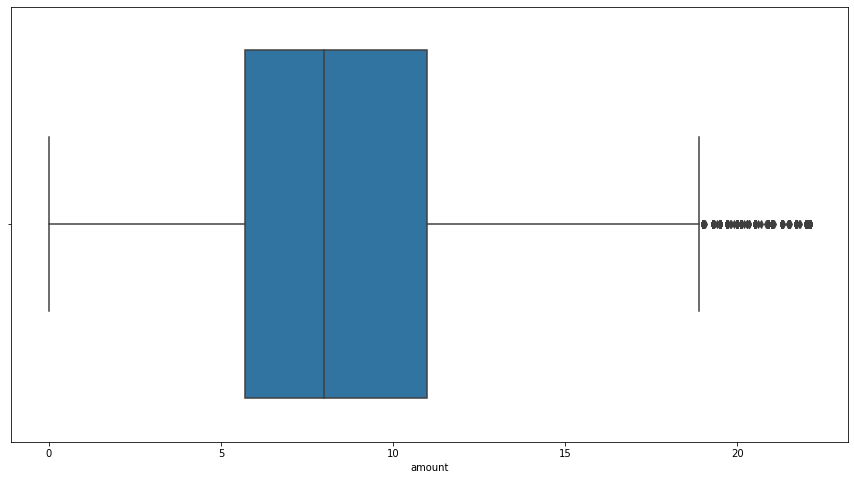

In [49]:
# checking outliers in amount

sns.boxplot(x=dfFinal.amount,data =dfFinal)
plt.show()

In [50]:
HigherLimitValue=Q3+1.5 *IQR
#dfFinal.amount
#value[0]
dfFinal[dfFinal.amount > HigherLimitValue[0]]

,amount,longitude_of_pickup,latitude_of_pickup,no_of_passenger,year_of_pick_up,month_of_pick_up,day_of_pick_up,hour_of_pick_up,min_of_pick_up,sec_of_pick_up


In [51]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38781 entries, 1 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount               38781 non-null  float64
 1   longitude_of_pickup  38781 non-null  float64
 2   latitude_of_pickup   38781 non-null  float64
 3   no_of_passenger      38781 non-null  int64  
 4   year_of_pick_up      38781 non-null  int64  
 5   month_of_pick_up     38781 non-null  int64  
 6   day_of_pick_up       38781 non-null  int64  
 7   hour_of_pick_up      38781 non-null  int64  
 8   min_of_pick_up       38781 non-null  int64  
 9   sec_of_pick_up       38781 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.3 MB


In [52]:
dfFinal.head()

,amount,longitude_of_pickup,latitude_of_pickup,no_of_passenger,year_of_pick_up,month_of_pick_up,day_of_pick_up,hour_of_pick_up,min_of_pick_up,sec_of_pick_up
1,16.9,-74.016048,40.711303,1,2010,1,5,16,52,16
2,5.7,-73.982738,40.761270,2,2011,8,18,0,35,0
3,7.7,-73.987130,40.733143,1,2012,4,21,4,30,42
4,5.3,-73.968095,40.768008,1,2010,3,9,7,51,0
5,12.1,-74.000964,40.731630,1,2011,1,6,9,50,45


In [53]:
# ploting the scatter graph 

def plotScatter(model):
  
    plt.scatter(Y_test,testPredictions)
    plt.xlabel('Targets' ,size = 18)
    plt.ylabel('Predictions',size = 18)
    plt.show()


        
   

In [54]:
# updating the accuracy score

# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'Mean Square Error', 'Root Mean Square Error', 'R2-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 

def updateScoreCard(model_name):
    global score_card
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    
    score_card = score_card.append({'Model': model_name,
                                        'Mean Square Error': mean_squared_error(Y_test, testPredictions),
                                        'Root Mean Square Error': np.sqrt(mean_squared_error(Y_test, testPredictions)) ,
                                        'R2-score': r2_score(Y_test, testPredictions)}, 
                                        ignore_index = True)
    return(score_card)

In [55]:
# seperating target variable and storing in different variable
X=dfFinal.drop('amount',axis=1)
Y=dfFinal['amount']



In [56]:
# checking the shape 

print(X.shape,Y.shape)

(38781, 9) (38781,)


In [57]:
# converting the data int X and Y since it contains skewness

#X=np.log(X)
#Y=np.log(Y)





In [58]:
# splitig the data into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [59]:
#  Scaling the data using Minmax Scalar

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=scaler.fit_transform(X_train)

scaler.fit(X_test)

X_test=scaler.fit_transform(X_test)



In [60]:
# rechecking the shape after performing MinMax scalar

print('X_train : ',X_train.shape,'X_test : ',X_test.shape)

X_train :  (29085, 9) X_test :  (9696, 9)


# 1. Linear Regression Model  with OLS

In [61]:
# fiting the model

LrModelOLS=LinearRegression()



LrModelOLS.fit(X_train,Y_train)

LinearRegression()

In [62]:
# prediction 
trainPredictions=LrModelOLS.predict(X_train)
testPredictions=LrModelOLS.predict(X_test)

In [63]:
# train summary

print(r2_score(Y_train,trainPredictions) )

0.03384443129109138


In [64]:
# test summary

print(r2_score(Y_test,testPredictions))

0.035278425895969856


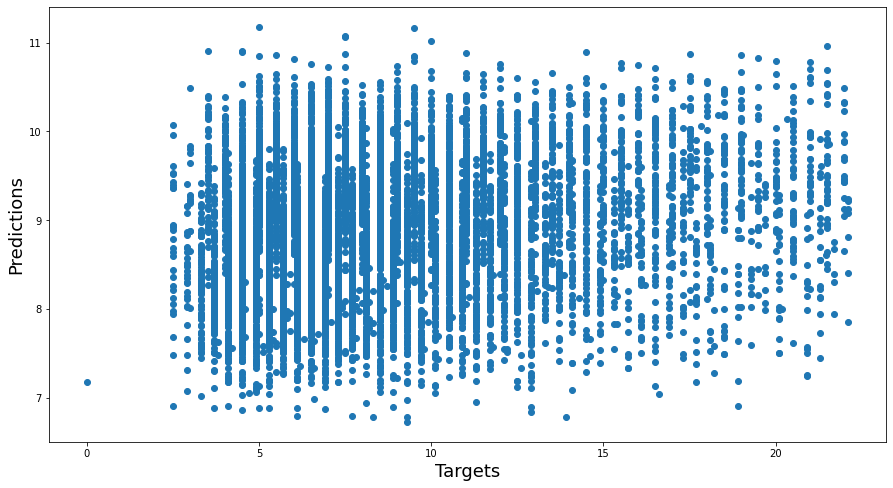

In [65]:
# ploting the graph between

plotScatter(LrModelOLS)

Conclusion :- From the scatter plot we can say that our model is not working good.

In [66]:
# Updating the score table

updateScoreCard('Linear Regression OLS (Base) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278


#  2. Linear Regression Model with OLS after performing RFE

In [67]:
# using the RFE model find the most important columns or features

selector=RFE(LrModelOLS,n_features_to_select=5,step=1)

selector.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [68]:
# getting  all the important columns

ImpColumns=X.columns[selector.support_]

ImpColumns

Index(['longitude_of_pickup', 'latitude_of_pickup', 'no_of_passenger',
       'year_of_pick_up', 'month_of_pick_up'],
      dtype='object')

In [69]:
# getting data from only the important columns

X=dfFinal[ImpColumns]
Y=dfFinal['amount']

In [70]:
# checking the shape 

print('X-shape : ',X.shape,'Y-shape : ',Y.shape)

X-shape :  (38781, 5) Y-shape :  (38781,)


In [71]:
# spliting the columns

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [72]:
#  Scaling the data using Minmax Scalar

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=scaler.fit_transform(X_train)

scaler.fit(X_test)

X_test=scaler.fit_transform(X_test)

In [73]:
# fitting the model

RfeLrModelOLS=LinearRegression()

RfeLrModelOLS.fit(X_train,Y_train)

LinearRegression()

In [74]:
# prediction 

trainPredictions=RfeLrModelOLS.predict(X_train)
testPredictions=RfeLrModelOLS.predict(X_test)

In [75]:
# train summary

print(r2_score(Y_train,trainPredictions) )

0.03380968866377243


In [76]:
# test summary

print(r2_score(Y_test,testPredictions))

0.03533853363551087


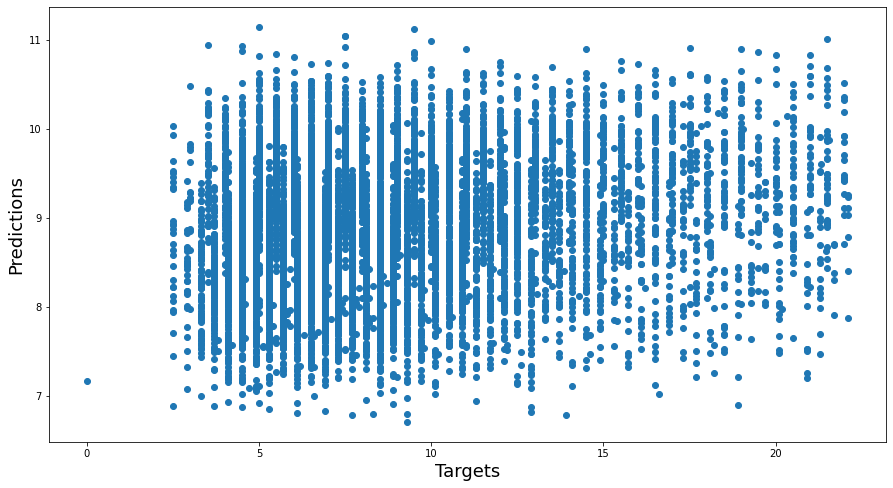

In [77]:
# ploting the graph between

plotScatter(RfeLrModelOLS)

In [78]:
# Updating the score table

updateScoreCard('Linear Regression OLS (RFE) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278
1,Linear Regression OLS (RFE),16.315860,4.039289,0.035339


Conclusion  :- From the graph it is clear that the model performance is not getting improved after applying RFE also. R2 score is also not getting improved. So we can say that Linear Regression is not a best model for this dataset.

# 3. Linear Regression Using SGD

In [79]:

X=dfFinal.drop('amount',axis=1)
Y=dfFinal.amount

# checking the shape after sliping
print('X-shape : ',X.shape,'Y-shape : ',Y.shape)

X-shape :  (38781, 9) Y-shape :  (38781,)


In [80]:
# dividing into training data and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

# checking the shape of training data and testing data

print('X-train : ',X_train.shape,'X-test : ',X_test.shape,'Y-train : ',Y_test.shape,'Y-test : ',Y_test.shape)

X-train :  (29085, 9) X-test :  (9696, 9) Y-train :  (9696,) Y-test :  (9696,)


In [81]:
#  Scaling the data using Minmax Scalar

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=scaler.fit_transform(X_train)

scaler.fit(X_test)

X_test=scaler.fit_transform(X_test)

In [82]:
# fiting the model 

SGDLrModel=SGDRegressor()

SGDLrModel.fit(X_train,Y_train)

SGDRegressor()

In [83]:
# predictions

trainPredictions=SGDLrModel.predict(X_train)
testPredictions=SGDLrModel.predict(X_test)

In [84]:
# train summary

print(r2_score(Y_train,trainPredictions))

0.03323329931338981


In [85]:
# test Summary 

print(r2_score(Y_test,testPredictions))

0.0348596798151114


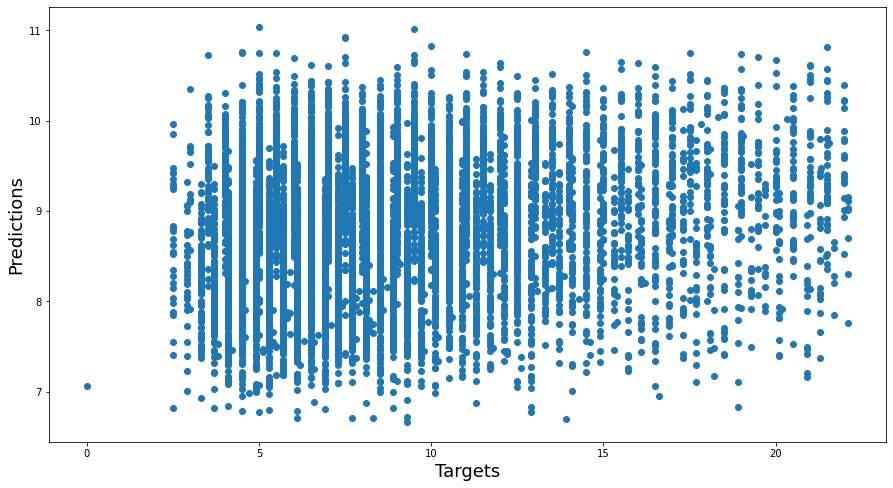

In [86]:
# ploting the graph between

plotScatter(SGDLrModel)

In [87]:
# updating the scorecard

updateScoreCard('Linear Regression SGD (Base) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278
1,Linear Regression OLS (RFE),16.315860,4.039289,0.035339
2,Linear Regression SGD (Base),16.323959,4.040292,0.034860


Conclusion :- The performance SGD Linear Regression is very bad for this dataset.

# 4. Linear Regression with SGD after performing RFE

In [88]:
# getting  most important features 

SGDRfeModel=RFE(SGDLrModel,n_features_to_select=5,step=1)

SGDRfeModel.fit(X_train,Y_train)

RFE(estimator=SGDRegressor(), n_features_to_select=5)

In [89]:
# getting the important features

SGDImpcolumns=X.columns[SGDRfeModel.support_]
SGDImpcolumns

Index(['latitude_of_pickup', 'no_of_passenger', 'year_of_pick_up',
       'month_of_pick_up', 'min_of_pick_up'],
      dtype='object')

In [90]:
# spliting the data 

X=dfFinal[SGDImpcolumns]
Y= dfFinal['amount']

# checking the shape after spliting

print('X-shape : ',X.shape,'Y-shape',Y.shape)

X-shape :  (38781, 5) Y-shape (38781,)


In [91]:
# dividing the data into training data and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

# checking the shape after sliting 

print('X-train : ',X_train.shape,'X-test : ',X_test.shape,'Y-train : ',Y_test.shape,'Y-test : ',Y_test.shape)

X-train :  (29085, 5) X-test :  (9696, 5) Y-train :  (9696,) Y-test :  (9696,)


In [92]:
#  Scaling the data using Minmax Scalar

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=scaler.fit_transform(X_train)

scaler.fit(X_test)

X_test=scaler.fit_transform(X_test)

In [93]:
# model fiting

SGDRfeLrModel=SGDRegressor()

SGDRfeLrModel.fit(X_train,Y_train)

SGDRegressor()

In [94]:
# prediction 

trainPredictions=SGDRfeLrModel.predict(X_train)
testPredictions=SGDRfeLrModel.predict(X_test)


In [95]:
# train summary

print(r2_score(Y_train,trainPredictions) )


0.03225309659160058


In [96]:
# test summary

print(r2_score(Y_test,testPredictions))


0.03383069993736254


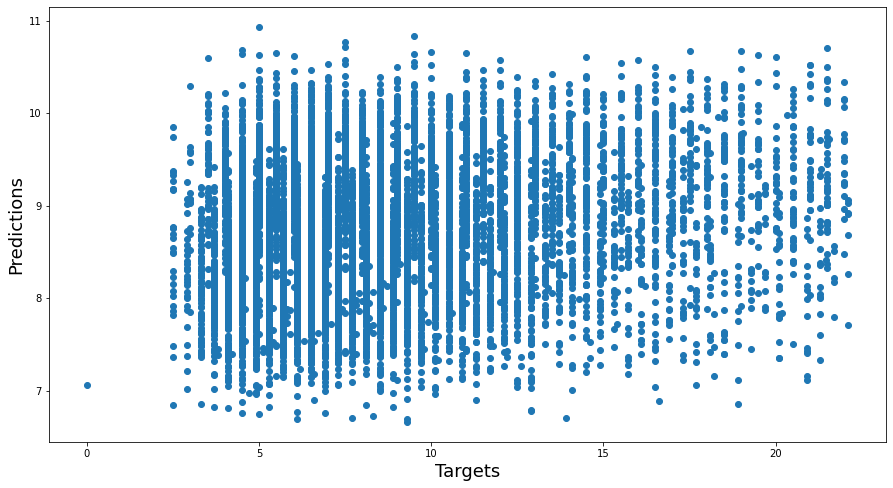

In [97]:
# ploting the graph between

plotScatter(SGDRfeLrModel)

In [98]:
# Updating the score table

updateScoreCard('Linear Regression SGD (RFE) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278
1,Linear Regression OLS (RFE),16.315860,4.039289,0.035339
2,Linear Regression SGD (Base),16.323959,4.040292,0.034860
3,Linear Regression SGD (RFE),16.341362,4.042445,0.033831


Conclusion :- After building the model by using the features got from RFE we couldn't see much improvement in model.

# 5. Decision Tree Regressor

In [99]:
# building the basic model 

X=dfFinal.drop('amount',axis=1)

Y=dfFinal['amount']


In [100]:
print('X-shape : ',X.shape,'Y-shape : ',Y.shape)

X-shape :  (38781, 9) Y-shape :  (38781,)


In [101]:
# spliting the data 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [102]:
print('X-train : ',X_train.shape,'X-test : ',X_test.shape,'Y-train : ',Y_test.shape,'Y-test : ',Y_test.shape)

X-train :  (29085, 9) X-test :  (9696, 9) Y-train :  (9696,) Y-test :  (9696,)


In [103]:
#  Scaling the data using Minmax Scalar

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=scaler.fit_transform(X_train)

scaler.fit(X_test)

X_test=scaler.fit_transform(X_test)

In [104]:
# fiting the model

DecisionTreeModel=DecisionTreeRegressor()

DecisionTreeModel.fit(X_train, Y_train)



DecisionTreeRegressor()

In [105]:
# predictions

trainPredictions=DecisionTreeModel.predict(X_train)
testPredictions=DecisionTreeModel.predict(X_test)

In [106]:
# train summary

print(r2_score(Y_train,trainPredictions))

1.0


In [107]:
# test summary

print(r2_score(Y_test,testPredictions))

-0.9810103709385096


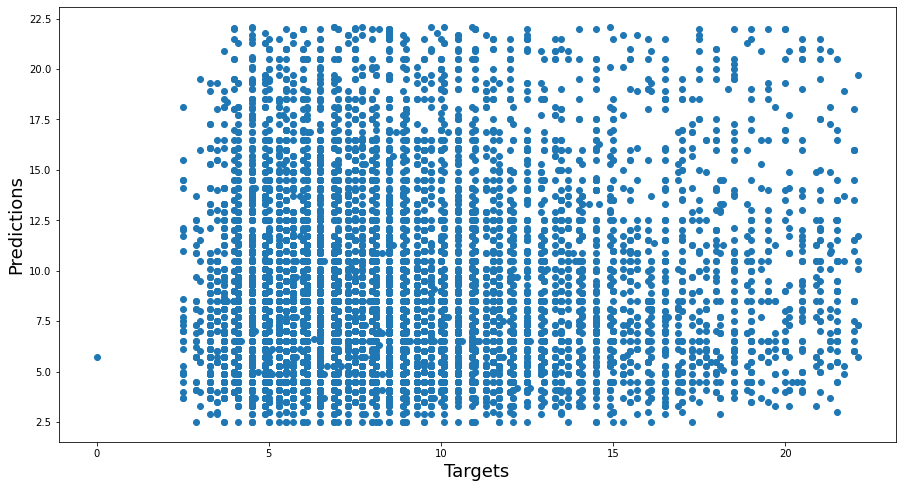

In [108]:
# ploting the graph between

plotScatter(DecisionTreeModel)

In [109]:
# updating the scorecard

updateScoreCard('Desicion Tree (Base) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278
1,Linear Regression OLS (RFE),16.315860,4.039289,0.035339
2,Linear Regression SGD (Base),16.323959,4.040292,0.034860
3,Linear Regression SGD (RFE),16.341362,4.042445,0.033831
4,Desicion Tree (Base),33.505938,5.788431,-0.981010


Conclusion :- Decision tree is not a good for the current dataframe.

# 6. Desicion Tree After performing RFE

In [110]:
# using the RFE model find the most important columns or features

DesicionTreeRfe=RFE(DecisionTreeModel,n_features_to_select=5,step=1)

DesicionTreeRfe.fit(X_train,Y_train)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

In [111]:
# getting all the important features 

DecisionTreeImpColumns=X.columns[selector.support_]

DecisionTreeImpColumns

Index(['longitude_of_pickup', 'latitude_of_pickup', 'no_of_passenger',
       'year_of_pick_up', 'month_of_pick_up'],
      dtype='object')

In [112]:
# spliting the data

X=dfFinal[DecisionTreeImpColumns]
Y=dfFinal['amount']

In [113]:
# spliting the data into training data and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

print('X-train : ',X_train.shape,'X-test : ',X_test.shape,'Y-train : ',Y_test.shape,'Y-test : ',Y_test.shape)

X-train :  (29085, 5) X-test :  (9696, 5) Y-train :  (9696,) Y-test :  (9696,)


In [114]:
#  Scaling the data using Minmax Scalar

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=scaler.fit_transform(X_train)

scaler.fit(X_test)

X_test=scaler.fit_transform(X_test)

In [115]:
# fiting the model

DecisionTreeRfeModel=DecisionTreeRegressor()

DecisionTreeRfeModel.fit(X_train,Y_train)

DecisionTreeRegressor()

In [116]:
# prediction 

trainPredictions=DecisionTreeRfeModel.predict(X_train)
testPredictions=DecisionTreeRfeModel.predict(X_test)

In [117]:
# train summary

print(r2_score(Y_train,trainPredictions) )

0.9999973771103324


In [118]:
# test summary

print(r2_score(Y_test,testPredictions))

-0.9591877495020069


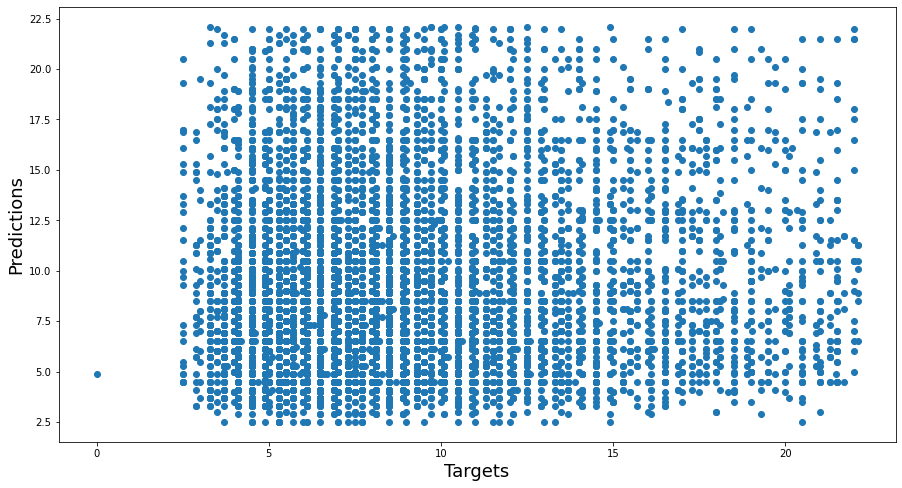

In [119]:
# ploting the graph between

plotScatter(DecisionTreeRfeModel)

In [120]:
# Updating the score table

updateScoreCard('Decision Tree  (RFE) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278
1,Linear Regression OLS (RFE),16.315860,4.039289,0.035339
2,Linear Regression SGD (Base),16.323959,4.040292,0.034860
3,Linear Regression SGD (RFE),16.341362,4.042445,0.033831
4,Desicion Tree (Base),33.505938,5.788431,-0.981010
5,Decision Tree (RFE),33.136839,5.756461,-0.959188


Conclusion :- There is no much improvement in the model performance after building the model with features after performing RFE.

# 7. Descision Tree after performing Grid Search

In [121]:
# selecting parameters for grid search

tuned_paramaters = [{
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [122]:
# performing grid search

grid = GridSearchCV(estimator = DecisionTreeModel, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

DecisionGrid = grid.fit(X_train, Y_train)

# get the best parameters
print('Best parameters for decision tree Regressor: ', DecisionGrid.best_params_, '\n')

Best parameters for decision tree Regressor:  {'max_depth': 9, 'max_leaf_nodes': 25, 'min_samples_leaf': 30, 'min_samples_split': 30} 



In [123]:
# performing the desicion tree with the parameters

DecisionTreeGridModel=DecisionTreeRegressor(
                                                max_depth=DecisionGrid.best_params_.get('max_depth'),
                                                max_leaf_nodes=DecisionGrid.best_params_.get('max_leaf_nodes'),
                                                min_samples_leaf=DecisionGrid.best_params_.get('max_leaf_nodes'),
                                                min_samples_split=DecisionGrid.best_params_.get('min_samples_split')
    
                                            )

DecisionTreeGridModel.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9, max_leaf_nodes=25, min_samples_leaf=25,
                      min_samples_split=30)

In [124]:
# test predictions

trainPredictions=DecisionTreeGridModel.predict(X_train)
testPredictions=DecisionTreeGridModel.predict(X_test)

In [125]:
# train summary 

print(r2_score(Y_train,trainPredictions))

0.06548145481447865


In [126]:
# test summary

print(r2_score(Y_test,testPredictions))

0.053035105435683905


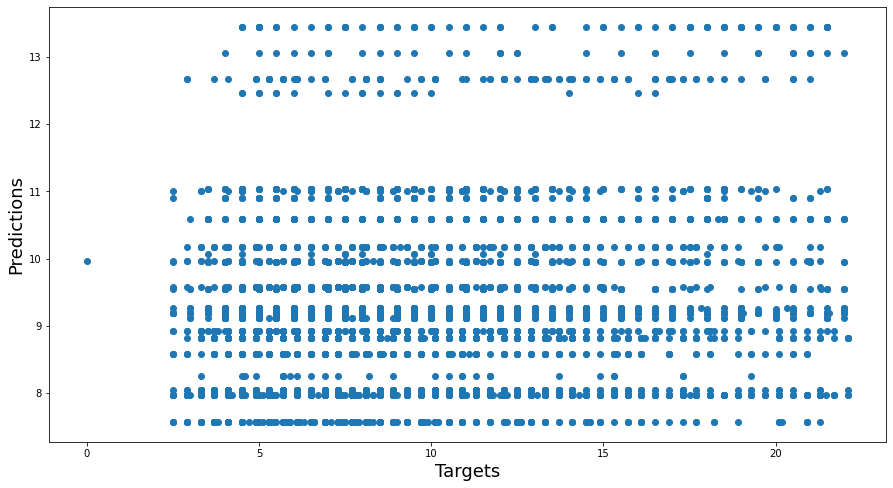

In [127]:
# ploting the graph

plotScatter(DecisionTreeGridModel)

In [128]:
# Updating the score table

updateScoreCard('Decision Tree  (Grid Search) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278
1,Linear Regression OLS (RFE),16.315860,4.039289,0.035339
2,Linear Regression SGD (Base),16.323959,4.040292,0.034860
3,Linear Regression SGD (RFE),16.341362,4.042445,0.033831
4,Desicion Tree (Base),33.505938,5.788431,-0.981010
5,Decision Tree (RFE),33.136839,5.756461,-0.959188
6,Decision Tree (Grid Search),16.016548,4.002068,0.053035


Conclusion :- There is some improvement in the model performance after building the model with feature from gridsearch. 

# 8. Random Forest 

In [129]:
# fiting the model

RandomForestModel=RandomForestRegressor()

RandomForestModel.fit(X_train,Y_train)

RandomForestRegressor()

In [130]:
# predictions

trainPredictions=RandomForestModel.predict(X_train)
testPredictions=RandomForestModel.predict(X_test)

In [131]:
# train summary

print(r2_score(Y_train,trainPredictions))

0.8551888463004635


In [132]:
# test predictions

print(r2_score(Y_test,testPredictions))

-0.026256866003728785


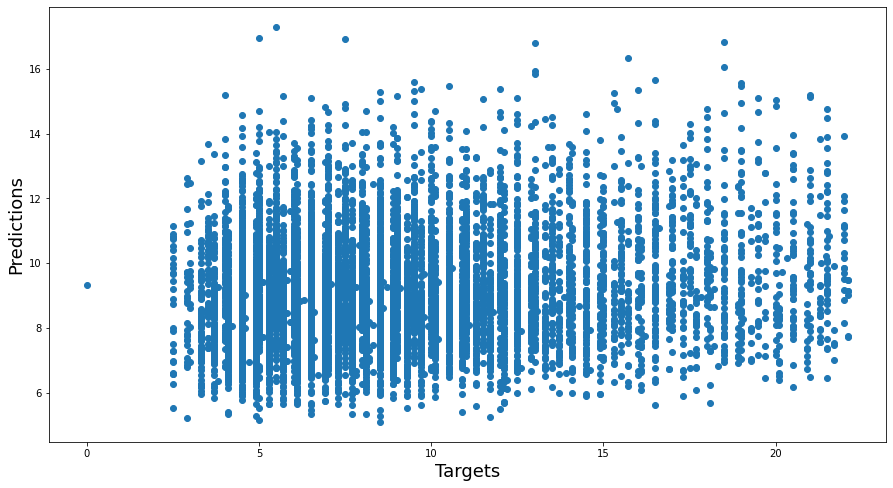

In [133]:
# ploting the graph 

plotScatter(RandomForestModel)

In [134]:
# Updating the score table

updateScoreCard('Random Forest  (Base) ')

,Model,Mean Square Error,Root Mean Square Error,R2-score
0,Linear Regression OLS (Base),16.316876,4.039415,0.035278
1,Linear Regression OLS (RFE),16.315860,4.039289,0.035339
2,Linear Regression SGD (Base),16.323959,4.040292,0.034860
3,Linear Regression SGD (RFE),16.341362,4.042445,0.033831
4,Desicion Tree (Base),33.505938,5.788431,-0.981010
5,Decision Tree (RFE),33.136839,5.756461,-0.959188
6,Decision Tree (Grid Search),16.016548,4.002068,0.053035
7,Random Forest (Base),17.357657,4.166252,-0.026257


# 9. Random forest with GridSearch

In [135]:
# selecting parameters for grid search

tuned_paramaters = [{
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25],
                     'n_estimators': [10,25,30,50,100,200]}]

In [136]:
# performing grid search

grid = GridSearchCV(estimator = RandomForestModel, 
                         param_grid = tuned_paramaters, 
                         cv = 4)

RandomForestGrid = grid.fit(X_train, Y_train)

# get the best parameters
print('Best parameters for Random Forest  Regressor: ', RandomForestGrid.best_params_, '\n')

KeyboardInterrupt: 